✅ reads.csv dosyası başarıyla yüklendi.

--- Çoğunluk Oyu ile 'is_hemorrhage' Etiketi Oluşturuldu ---
           name  ICH_majority  IPH_majority  IVH_majority  SDH_majority  \
0  CQ500-CT-427             1             1             0             0   
1  CQ500-CT-181             1             0             0             0   
2   CQ500-CT-99             0             0             0             0   
3   CQ500-CT-47             0             0             0             0   
4  CQ500-CT-195             0             0             0             0   

   EDH_majority  SAH_majority  is_hemorrhage  
0             0             0              1  
1             1             1              1  
2             0             0              0  
3             0             0              0  
4             0             0              0  

--- Nihai Etiket Dağılımı ---
is_hemorrhage
0    286
1    205
Name: count, dtype: int64

CSV'den gelen hasta adı: 'CQ500-CT-427'
Aranacak klasör adı: 'CQ500CT427 CQ

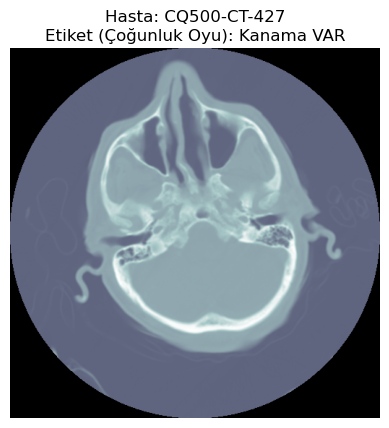

In [1]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import os
import glob
from collections import Counter

# --- 1. Dosya Yolları ---
CSV_YOLU = '../Data/HeadCT/reads.csv' 
DICOM_ANA_KLASORU = '../Data/HeadCT'

try:
    # --- 2. 'reads.csv' Yükleme ve Etiketleme ---
    df = pd.read_csv(CSV_YOLU)
    print("✅ reads.csv dosyası başarıyla yüklendi.")
    
    hemorrhage_types = ['ICH', 'IPH', 'IVH', 'SDH', 'EDH', 'SAH']
    
    for h_type in hemorrhage_types:
        df[f'{h_type}_votes'] = df[f'R1:{h_type}'] + df[f'R2:{h_type}'] + df[f'R3:{h_type}']
    for h_type in hemorrhage_types:
        df[f'{h_type}_majority'] = (df[f'{h_type}_votes'] >= 2).astype(int)
        
    majority_columns = [f'{h_type}_majority' for h_type in hemorrhage_types]
    df['is_hemorrhage'] = (df[majority_columns].any(axis=1)).astype(int)

    print("\n--- Çoğunluk Oyu ile 'is_hemorrhage' Etiketi Oluşturuldu ---")
    print(df[['name'] + majority_columns + ['is_hemorrhage']].head())
    
    print("\n--- Nihai Etiket Dağılımı ---")
    print(df['is_hemorrhage'].value_counts())
    
    # --- 3. Örnek DICOM Görüntüleme (DÜZELTİLMİŞ ARAMA) ---
    hemorrhage_sample = df[df['is_hemorrhage'] == 1].iloc[0]
    sample_patient_name_csv = hemorrhage_sample['name']
    sample_label = hemorrhage_sample['is_hemorrhage']
    
    # YENİ ADIM: CSV'deki ismi klasör adıyla eşleştirmek için formatla
    # Örnek: "CQ500-CT-427" -> "CQ500CT427 CQ500CT427"
    name_no_hyphen = sample_patient_name_csv.replace('-', '')
    search_folder_name = f"{name_no_hyphen} {name_no_hyphen}"
    
    print(f"\nCSV'den gelen hasta adı: '{sample_patient_name_csv}'")
    print(f"Aranacak klasör adı: '{search_folder_name}'")
    
    search_pattern = os.path.join(
        DICOM_ANA_KLASORU, 
        'qct*', 
        search_folder_name, # Düzeltilmiş klasör adını kullan
        '**', 
        '*.dcm'
    )
    
    print(f"Aranan dosya deseni: {search_pattern}")
    dicom_files = glob.glob(search_pattern, recursive=True)
    
    if dicom_files:
        most_common_dir = Counter(os.path.dirname(f) for f in dicom_files).most_common(1)[0][0]
        series_files = sorted([f for f in dicom_files if os.path.dirname(f) == most_common_dir])
        
        middle_slice_index = len(series_files) // 2
        sample_image_path = series_files[middle_slice_index]
        
        print(f"✅ Hasta '{sample_patient_name_csv}' için toplam {len(dicom_files)} DICOM dosyası bulundu.")
        print(f"En kalabalık seride ({os.path.basename(most_common_dir)}) {len(series_files)} kesit var.")
        print(f"Ortadaki kesit gösteriliyor.")
        
        dcm_file = pydicom.dcmread(sample_image_path)
        
        plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)
        plt.title(f"Hasta: {sample_patient_name_csv}\nEtiket (Çoğunluk Oyu): {'Kanama VAR' if sample_label == 1 else 'Kanama YOK'}")
        plt.axis('off')
        plt.show()
    else:
        print(f"❌ HATA: '{search_folder_name}' klasörü bulunamadı veya içinde .dcm dosyası yok.")

except Exception as e:
    print(f"❌ Bir hata oluştu: {e}")

In [2]:
import pandas as pd
import os
import glob
from tqdm.notebook import tqdm
from collections import Counter

# --- 1. Dosya Yolları (Notebooks klasöründen çalışmak için Düzeltildi) ---
# Şu anki çalışma dizinini kontrol edelim
print(f"Şu anki çalışma dizini: {os.getcwd()}")

# Bir üst dizine çıkıp 'Data' klasörüne girmek için '../' kullanıyoruz.
CSV_YOLU = '../Data/HeadCT/reads.csv' 
DICOM_ANA_KLASORU = '../Data/HeadCT'

try:
    # --- 2. 'reads.csv' Yükleme ve Etiketleme ---
    df_labels = pd.read_csv(CSV_YOLU)
    print("✅ reads.csv dosyası başarıyla yüklendi.")
    
    hemorrhage_types = ['ICH', 'IPH', 'IVH', 'SDH', 'EDH', 'SAH']
    
    for h_type in hemorrhage_types:
        df_labels[f'{h_type}_votes'] = df_labels[f'R1:{h_type}'] + df_labels[f'R2:{h_type}'] + df_labels[f'R3:{h_type}']
    for h_type in hemorrhage_types:
        df_labels[f'{h_type}_majority'] = (df_labels[f'{h_type}_votes'] >= 2).astype(int)
        
    majority_columns = [f'{h_type}_majority' for h_type in hemorrhage_types]
    df_labels['is_hemorrhage'] = (df_labels[majority_columns].any(axis=1)).astype(int)

    print("Etiketler başarıyla oluşturuldu.")

    # --- 3. Tüm DICOM Dosyalarının Yollarını Bul ve Etiketlerle Eşleştir ---
    master_list = []
    print("\nTüm DICOM dosyaları taranıyor ve etiketlerle eşleştiriliyor...")

    for index, row in tqdm(df_labels.iterrows(), total=df_labels.shape[0]):
        patient_name_csv = row['name']
        label = row['is_hemorrhage']
        
        name_no_hyphen = patient_name_csv.replace('-', '')
        search_folder_name = f"{name_no_hyphen} {name_no_hyphen}"
        
        search_pattern = os.path.join(
            DICOM_ANA_KLASORU, 
            'qct*', 
            search_folder_name,
            '**', 
            '*.dcm'
        )
        
        dicom_files = glob.glob(search_pattern, recursive=True)
        
        for file_path in dicom_files:
            normalized_path = file_path.replace('\\', '/')
            master_list.append({'dicom_path': normalized_path, 'is_hemorrhage': label})

    # --- 4. Master DataFrame'i Oluştur ve Kaydet ---
    if master_list:
        df_master = pd.DataFrame(master_list)
        
        output_path = '../Data/processed/master_image_list.csv'
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        
        df_master.to_csv(output_path, index=False)
        
        print(f"\n✅ Başarılı! Toplam {len(df_master)} DICOM dosyası bulundu.")
        print(f"Master liste '{output_path}' adresine kaydedildi.")
        print("\nİlk 5 satır:")
        print(df_master.head())
    else:
        print("❌ HATA: Hiç DICOM dosyası bulunamadı. Lütfen dosya yollarını ve klasör yapısını kontrol edin.")

except FileNotFoundError:
    print(f"❌ HATA: '{CSV_YOLU}' yolu bulunamadı. Çalışma dizininin '{os.getcwd()}' olduğundan ve dosya yapınızın doğru olduğundan emin olun.")
except Exception as e:
    print(f"❌ Bir hata oluştu: {e}")

Şu anki çalışma dizini: c:\Users\iamem\OneDrive\Desktop\AI-Proje\Prototype2\notebooks
✅ reads.csv dosyası başarıyla yüklendi.
Etiketler başarıyla oluşturuldu.

Tüm DICOM dosyaları taranıyor ve etiketlerle eşleştiriliyor...


  0%|          | 0/491 [00:00<?, ?it/s]


✅ Başarılı! Toplam 164798 DICOM dosyası bulundu.
Master liste '../Data/processed/master_image_list.csv' adresine kaydedildi.

İlk 5 satır:
                                          dicom_path  is_hemorrhage
0  ../Data/HeadCT/qct14/CQ500CT427 CQ500CT427/Unk...              1
1  ../Data/HeadCT/qct14/CQ500CT427 CQ500CT427/Unk...              1
2  ../Data/HeadCT/qct14/CQ500CT427 CQ500CT427/Unk...              1
3  ../Data/HeadCT/qct14/CQ500CT427 CQ500CT427/Unk...              1
4  ../Data/HeadCT/qct14/CQ500CT427 CQ500CT427/Unk...              1
